## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
single_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
single_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count=single_data["Mouse ID"].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dupe = single_data[single_data.duplicated()]
mouse_dupe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
#Check context to confirm duplicates
print(single_data.iloc[[905, 906, 907, 908, 909, 910, 911, 912, 913], :])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
905     g867     Stelasyn  Female           9          25          5   
906     g867     Stelasyn  Female           9          25         10   
907     g867     Stelasyn  Female           9          25         15   
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   

     Tumor Volume (mm3)  Metastatic Sites  
905           46.880749                 0  
906           48.183402                 0  
907           51.060419                 1  
908           45.000000                 0  
909           45.000000                 0  
910           4

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data = single_data.drop_duplicates()
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
clean_data = single_data.loc[single_data["Mouse ID"]!= "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()


248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

first_mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

first_median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

first_variance= clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

first_sd = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

first_sem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
sum_statistics = pd.concat([first_mean.rename("Mean Tumor Volume"),first_median.rename("Median Tumor Volume"), first_variance.rename("Tumor Volume Variance"), first_sd.rename("Standard Deviation"), first_sem.rename("Tumor Volume Std. Err.")], axis = 1)
sum_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Standard Deviation,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
described_data = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
described_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

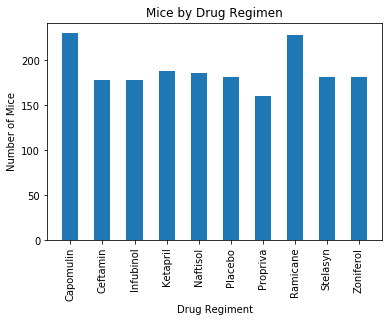

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
drug_regimens = mouse_data["Drug Regimen"].drop_duplicates()
drug_regimens = drug_regimens.sort_values(ascending = True)
x_bar_pd = np.arange(len(drug_regimens))
tick_locations = [value for value in x_bar_pd]
y_bar_pd = mouse_data.groupby("Drug Regimen")["Mouse ID"].count()
plt.bar(x_bar_pd ,y_bar_pd, color ="tab:blue", align = "center",width = .5)
plt.title("Mice by Drug Regimen")
plt.xlabel("Drug Regiment")
plt.ylabel("Number of Mice")
plt.xticks(tick_locations, drug_regimens, rotation="vertical")
plt.show()

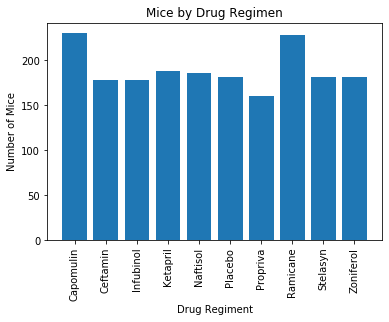

In [111]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouse_count = mouse_data.groupby("Drug Regimen")["Mouse ID"].count()
plt.bar(mouse_count.index.values, mouse_count.values)
plt.title("Mice by Drug Regimen")
plt.xlabel("Drug Regiment")
plt.ylabel("Number of Mice")
plt.xticks(tick_locations, drug_regimens, rotation="vertical");



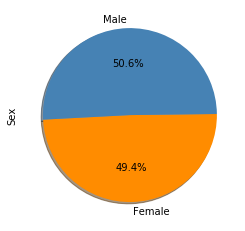

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = mouse_data["Sex"].drop_duplicates().sort_values(ascending = True)
gender_count = mouse_data.groupby("Sex")["Mouse ID"].count()
labels = gender
sizes = gender_count
colors = ["darkorange","steelblue"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow = True, startangle = 183)
plt.ylabel("Sex")
plt.show()

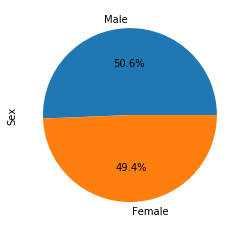

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_data["Sex"].value_counts().plot.pie(autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = clean_data.loc[mouse_data["Drug Regimen"].isin(final_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = final_tumor_volume.groupby("Mouse ID")["Timepoint"].max()

final_timepoint = final_timepoint.reset_index()                                   
final_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [54]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_final = pd.merge(final_timepoint, final_tumor_volume, on=["Mouse ID", "Timepoint"])
final_final.head(5)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [55]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments = []


for drug in final_regimens:
    variable_underscore = final_final.loc[final_final["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    drug_treatments.append(variable_underscore)
    quartiles = variable_underscore.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = variable_underscore.loc[(variable_underscore < lower_bound) | (variable_underscore> upper_bound)]

    print(f"The outliers for {drug}: {outliers}")
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 


# Locate the rows which contain mice on each drug and get the tumor volumes

    
# for drug in final_regimens:


    # Determine outliers using upper and lower bounds


The outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
The outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
The outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
The outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


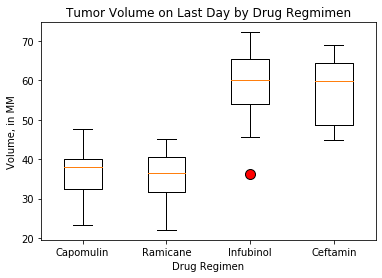

In [106]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='red', markersize=10)
plt.boxplot(drug_treatments, labels = final_regimens, flierprops=flierprops)
plt.title("Tumor Volume on Last Day by Drug Regmimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Volume, in MM")
plt.show()


## Line and Scatter Plots

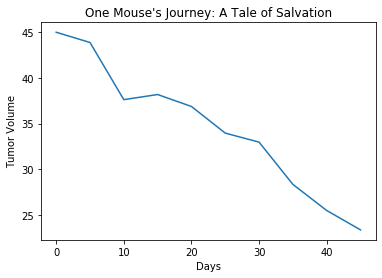

In [88]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
capomulin_mouse = capomulin.loc[capomulin["Mouse ID"]=="s185"]
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.title("One Mouse's Journey: A Tale of Salvation")
plt.ylabel("Tumor Volume")
plt.xlabel("Days");


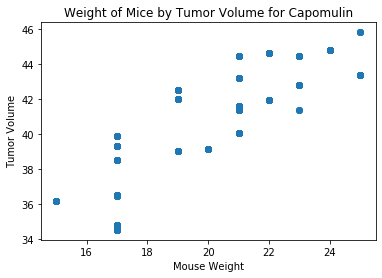

In [96]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_volume = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
final_data = pd.merge(mouse_data, capomulin_volume, on="Mouse ID")
plt.scatter(final_data["Weight (g)"], final_data["Tumor Volume (mm3)_y"]);
plt.title("Weight of Mice by Tumor Volume for Capomulin")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume");

## Correlation and Regression

In [82]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = sts.pearsonr(final_data["Weight (g)"], final_data["Tumor Volume (mm3)_y"])
round(correlation[0], 2)

0.83

In [83]:
(slope, intercept, rvalue, pvalue, sterr) = sts.linregress(final_data["Weight (g)"], final_data["Tumor Volume (mm3)_y"])
r_sqd= rvalue**2
r_sqd

0.6962164535925288

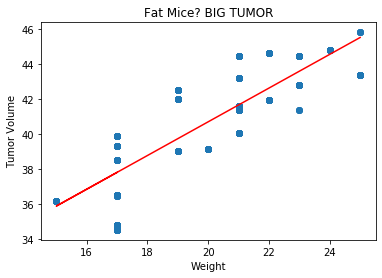

In [108]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = (final_data["Weight (g)"]) * slope + intercept
plt.scatter(final_data["Weight (g)"], final_data["Tumor Volume (mm3)_y"])
plt.plot(final_data["Weight (g)"],regress_values,"r-")
plt.title("Fat Mice? BIG TUMOR")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()

Observations! 
1. I wish mice (or anyone, for that matter) didn't get tumors. This was a bummer. I hope they're all okay.
2. After reviewing data from the four final drug treatments, Capomulin and Ramicane clearly demonstrate optimal final tumor volume, with lower outliers. Furthermore, both Capomulin and Ramicane both included more test subjects than other trials. At first glance, these two therapies were the most effective. 
3. As the weight increases in mice enrolled in the Capomulin trials, it appears there is a signicant positive correlation (.83) to increase tumor volume. This would indicate that the volume of the tumor on the final day of treatment was proportionate with the weight of the mice. I would be interested to compare this scatter plot to one measuring the correlative proportionality of weight and tumor volume at the opening day of trials.
4. While the prompts filtered tumor reading data and established the final tumor volume for those specific treatments, I believe the results may be incomplete. We are only looking at the final tumor volume, not at the net loss/gain for each mouse on each regimen. By graphing the final tumor volume against the net loss/gain of mass, we would be better able to gain insight into the drug's efficacy. 
